In [2]:
import OpenDartReader
api_key = 'e6ef535160372ff7b3a880036c22ab8b4fce4fdd'

In [3]:
dart = OpenDartReader(api_key) 

In [30]:
dart.report('005930', '배당', 2018)


,rcept_no,corp_cls,corp_code,corp_name,se,thstrm,frmtrm,lwfr,stock_knd
0,20190401004781,Y,00126380,삼성전자,주당액면가액(원),100,"5,000","5,000",NaN
1,20190401004781,Y,00126380,삼성전자,(연결)당기순이익(백만원),"43,890,877","41,344,569","22,415,655",NaN
2,20190401004781,Y,00126380,삼성전자,(별도)당기순이익(백만원),"32,815,127","28,800,837","11,579,749",NaN
3,20190401004781,Y,00126380,삼성전자,(연결)주당순이익(원),"6,461","299,868","157,967",NaN
4,20190401004781,Y,00126380,삼성전자,현금배당금총액(백만원),"9,619,243","5,826,302","3,991,892",NaN
5,20190401004781,Y,00126380,삼성전자,주식배당금총액(백만원),-,-,-,NaN
6,20190401004781,Y,00126380,삼성전자,(연결)현금배당성향(%),21.90,14.10,17.80,NaN
7,20190401004781,Y,00126380,삼성전자,현금배당수익률(%),3.70,1.70,1.60,보통주
8,20190401004781,Y,00126380,삼성전자,현금배당수익률(%),4.50,2.10,2.00,우선주
9,20190401004781,Y,00126380,삼성전자,주식배당수익률(%),-,-,-,보통주


In [43]:
list(range(3, 10))

[3, 4, 5, 6, 7, 8, 9]

In [54]:
for year in range(2018, 2021) :
    for i in range(11011,11015) :
        df = dart.finstate('삼성전자', year, reprt_code=i)
        is_연결재무제표 = df.fs_nm == "연결재무제표"
        is_유동자산 = df.account_nm == "유동자산"
        cur_assets = df[is_연결재무제표 & is_유동자산].thstrm_amount.values
        print(cur_assets, type(cur_assets))

['174,697,424,000,000'] <class 'numpy.ndarray'>
['156,976,839,000,000'] <class 'numpy.ndarray'>
['154,941,953,000,000'] <class 'numpy.ndarray'>
['176,282,049,000,000'] <class 'numpy.ndarray'>
['181,385,260,000,000'] <class 'numpy.ndarray'>
['173,433,478,000,000'] <class 'numpy.ndarray'>
['177,388,524,000,000'] <class 'numpy.ndarray'>
['186,042,134,000,000'] <class 'numpy.ndarray'>
['198,215,579,000,000'] <class 'numpy.ndarray'>
['186,136,845,000,000'] <class 'numpy.ndarray'>
['186,739,748,000,000'] <class 'numpy.ndarray'>
['203,634,913,000,000'] <class 'numpy.ndarray'>


In [128]:
import pandas as pd

데이터 = pd.DataFrame(columns=['year', 'quater', 'number'])

for year in range(2018, 2023) :
    for i in range(11011,11015) :
        df = dart.finstate('NAVER', year, reprt_code=i)
        is_연결재무제표 = df.fs_nm == "연결재무제표"
        is_유동자산 = df.account_nm == "매출액"
        cur_assets = df[is_연결재무제표 & is_유동자산].thstrm_amount.values.tolist()[0].replace(",", "")
        result = int(cur_assets)
        if i == 11011 :
            데이터 = 데이터.append(pd.DataFrame([[year, i%10, result/4]], columns=['year', 'quater', 'number']), ignore_index = True)
        
        else : 데이터 = 데이터.append(pd.DataFrame([[year, i%10, result]], columns=['year', 'quater', 'number']), ignore_index = True)
print(데이터)


C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_25072\3398956009.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  데이터 = 데이터.append(pd.DataFrame([[year, i%10, result/4]], columns=['year', 'quater', 'number']), ignore_index = True)
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_25072\3398956009.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  else : 데이터 = 데이터.append(pd.DataFrame([[year, i%10, result]], columns=['year', 'quater', 'number']), ignore_index = True)
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_25072\3398956009.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  else : 데이터 = 데이터.append(pd.DataFrame([[year, i%10, result]], columns=['year', 'quater', 'number']), ignore_index = True)
C:\Users\HwijunKwo

    year quater        number
0   2018      1  1.396726e+12
1   2018      2  1.363616e+12
2   2018      3  1.309060e+12
3   2018      4  1.397714e+12
4   2019      1  1.648350e+12
5   2019      2  1.630275e+12
6   2019      3  1.510862e+12
7   2019      4  1.664815e+12
8   2020      1  1.326036e+12
9   2020      2  1.902468e+12
10  2020      3  1.732064e+12
11  2020      4  1.360779e+12
12  2021      1  1.704400e+12
13  2021      2  1.663549e+12
14  2021      3  1.499070e+12
15  2021      4  1.727255e+12
16  2022      1  2.055020e+12
17  2022      2  2.045781e+12
18  2022      3  1.845222e+12
19  2022      4  2.057332e+12


C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_25072\3398956009.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  else : 데이터 = 데이터.append(pd.DataFrame([[year, i%10, result]], columns=['year', 'quater', 'number']), ignore_index = True)
C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_25072\3398956009.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  else : 데이터 = 데이터.append(pd.DataFrame([[year, i%10, result]], columns=['year', 'quater', 'number']), ignore_index = True)


In [129]:
데이터['day'] =1
데이터['month'] = 데이터['quater'] *3
print(데이터)


    year quater        number  day month
0   2018      1  1.396726e+12    1     3
1   2018      2  1.363616e+12    1     6
2   2018      3  1.309060e+12    1     9
3   2018      4  1.397714e+12    1    12
4   2019      1  1.648350e+12    1     3
5   2019      2  1.630275e+12    1     6
6   2019      3  1.510862e+12    1     9
7   2019      4  1.664815e+12    1    12
8   2020      1  1.326036e+12    1     3
9   2020      2  1.902468e+12    1     6
10  2020      3  1.732064e+12    1     9
11  2020      4  1.360779e+12    1    12
12  2021      1  1.704400e+12    1     3
13  2021      2  1.663549e+12    1     6
14  2021      3  1.499070e+12    1     9
15  2021      4  1.727255e+12    1    12
16  2022      1  2.055020e+12    1     3
17  2022      2  2.045781e+12    1     6
18  2022      3  1.845222e+12    1     9
19  2022      4  2.057332e+12    1    12


In [132]:
데이터['date'] = pd.to_datetime(데이터[['year', 'month', 'day']])

    

<AxesSubplot: xlabel='date'>

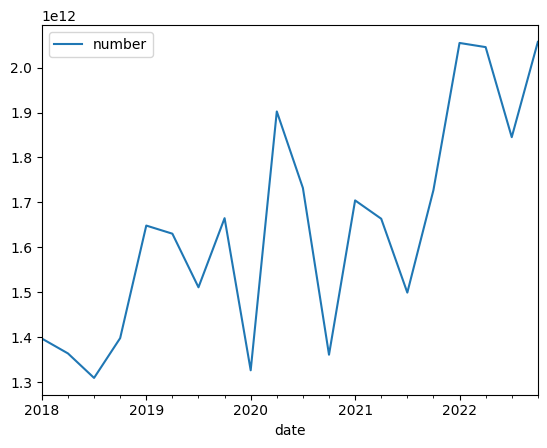

In [133]:
데이터.plot(x = 'date', y = 'number')

In [90]:
'1,309,059,864,248'.replace(",", "")

'1309059864248'

In [73]:
from datetime import datetime


In [69]:
print(매출액)

[array(['5,586,904,533,355'], dtype=object), array(['1,363,615,953,332'], dtype=object), array(['1,309,059,864,248'], dtype=object), array(['1,397,713,834,674'], dtype=object), array(['6,593,400,065,244'], dtype=object), array(['1,630,275,004,395'], dtype=object), array(['1,510,861,770,282'], dtype=object), array(['1,664,815,000,078'], dtype=object), array(['5,304,145,900,386'], dtype=object), array(['1,902,467,957,491'], dtype=object), array(['1,732,064,462,097'], dtype=object), array(['1,360,779,374,259'], dtype=object), array(['6,817,599,707,250'], dtype=object), array(['1,663,549,112,320'], dtype=object), array(['1,499,070,070,645'], dtype=object), array(['1,727,255,234,995'], dtype=object), array(['8,220,078,708,810'], dtype=object), array(['2,045,781,381,874'], dtype=object), array(['1,845,221,980,257'], dtype=object), array(['2,057,332,225,258'], dtype=object)]


In [6]:
dart.company('005930')

{'status': '000',
 'message': '정상',
 'corp_code': '00126380',
 'corp_name': '삼성전자(주)',
 'corp_name_eng': 'SAMSUNG ELECTRONICS CO,.LTD',
 'stock_name': '삼성전자',
 'stock_code': '005930',
 'ceo_nm': '한종희, 경계현',
 'corp_cls': 'Y',
 'jurir_no': '1301110006246',
 'bizr_no': '1248100998',
 'adres': '경기도 수원시 영통구  삼성로 129 (매탄동)',
 'hm_url': 'www.samsung.com/sec',
 'ir_url': '',
 'phn_no': '02-2255-0114',
 'fax_no': '031-200-7538',
 'induty_code': '264',
 'est_dt': '19690113',
 'acc_mt': '12'}

In [9]:
d

AttributeError: 'DataFrame' object has no attribute 'acount_nm'

In [21]:
import requests
import pprint
import json



b'<?xml version="1.0" encoding="UTF-8"?>\n<soapenv:Envelope xmlns:soapenv="http://schemas.xmlsoap.org/soap/envelope/">\n    <soapenv:Body>\n        <soapenv:Fault>\n            <faultcode>soapenv:Server</faultcode>\n            <faultstring>Policy Falsified</faultstring>\n            <faultactor>http://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService?serviceKey=ebl8Ut%2FJ2dsO84047u5ZUjBH53zpBM3YTtMLdGH0FkE6Ukn1z8Hy9WN45TvTQ%2BbdBRQctFDMT7GBZHqttCA8yg%3D%3D</faultactor>\n            <detail>\n                <l7:policyResult\n                    status="Service Not Found.  The request may have been sent to an invalid URL, or intended for an unsupported operation." xmlns:l7="http://www.layer7tech.com/ws/policy/fault"/>\n            </detail>\n        </soapenv:Fault>\n    </soapenv:Body>\n</soapenv:Envelope>\n'


In [28]:
res = requests.get('https://apis.data.go.kr/1160100/service/GetStockSecuritiesInfoService/getStockPriceInfo?serviceKey=ebl8Ut%2FJ2dsO84047u5ZUjBH53zpBM3YTtMLdGH0FkE6Ukn1z8Hy9WN45TvTQ%2BbdBRQctFDMT7GBZHqttCA8yg%3D%3D')

In [29]:
contents = json.loads(res.text)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)